# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

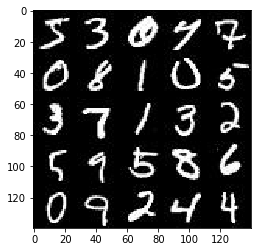

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

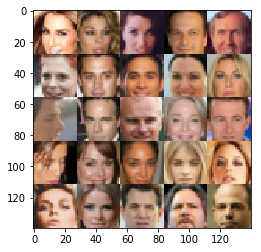

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/kelvin/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [9]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "input_real" )
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = "input_z" )
    learning_rate = tf.placeholder(tf.float32, (), name = "learn_rate" )
    
    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [93]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
            
        # Input 
        #    Num  28x28
        #    Face 28x28x3
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
      
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)
      
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.maximum(alpha * x3, x3)
      
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.sigmoid(logits)
        
    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [94]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
        
    alpha = 0.01
    with tf.variable_scope('generator', reuse=not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.maximum(alpha * x1, x1)
                
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2) 
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3) 
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [95]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_output = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_output, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [103]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
   
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [104]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [109]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100  #100
    print_every = 10  #100
    n_images = 9
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                # sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} ...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f} ...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 ... Discriminator Loss: 0.0150 ... Generator Loss: 4.4023
Epoch 0/2 ... Discriminator Loss: 0.0349 ... Generator Loss: 3.8795
Epoch 0/2 ... Discriminator Loss: 0.6324 ... Generator Loss: 3.3068
Epoch 0/2 ... Discriminator Loss: 0.2420 ... Generator Loss: 2.6204
Epoch 0/2 ... Discriminator Loss: 0.3447 ... Generator Loss: 2.0478
Epoch 0/2 ... Discriminator Loss: 0.0158 ... Generator Loss: 5.0054
Epoch 0/2 ... Discriminator Loss: 0.0408 ... Generator Loss: 4.2554
Epoch 0/2 ... Discriminator Loss: 0.5572 ... Generator Loss: 5.2007
Epoch 0/2 ... Discriminator Loss: 0.5118 ... Generator Loss: 1.6251
Epoch 0/2 ... Discriminator Loss: 0.8529 ... Generator Loss: 3.0788


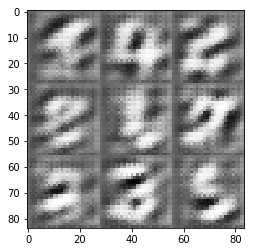

Epoch 0/2 ... Discriminator Loss: 0.4489 ... Generator Loss: 1.9674
Epoch 0/2 ... Discriminator Loss: 1.7933 ... Generator Loss: 0.2478
Epoch 0/2 ... Discriminator Loss: 0.2451 ... Generator Loss: 2.3486
Epoch 0/2 ... Discriminator Loss: 0.1989 ... Generator Loss: 2.0811
Epoch 0/2 ... Discriminator Loss: 0.0440 ... Generator Loss: 8.4984
Epoch 0/2 ... Discriminator Loss: 0.1044 ... Generator Loss: 3.0034
Epoch 0/2 ... Discriminator Loss: 0.0601 ... Generator Loss: 3.4380
Epoch 0/2 ... Discriminator Loss: 0.0347 ... Generator Loss: 5.1974
Epoch 0/2 ... Discriminator Loss: 0.0457 ... Generator Loss: 3.9089
Epoch 0/2 ... Discriminator Loss: 3.7187 ... Generator Loss: 0.0443


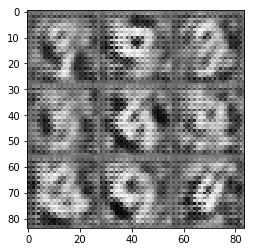

Epoch 0/2 ... Discriminator Loss: 0.7152 ... Generator Loss: 1.0447
Epoch 0/2 ... Discriminator Loss: 0.6144 ... Generator Loss: 3.8282
Epoch 0/2 ... Discriminator Loss: 0.4856 ... Generator Loss: 1.4851
Epoch 0/2 ... Discriminator Loss: 0.2663 ... Generator Loss: 4.2657
Epoch 0/2 ... Discriminator Loss: 1.0808 ... Generator Loss: 2.5521
Epoch 0/2 ... Discriminator Loss: 0.4449 ... Generator Loss: 4.7613
Epoch 0/2 ... Discriminator Loss: 0.4322 ... Generator Loss: 2.1524
Epoch 0/2 ... Discriminator Loss: 0.4982 ... Generator Loss: 1.2827
Epoch 0/2 ... Discriminator Loss: 0.0735 ... Generator Loss: 3.8648
Epoch 0/2 ... Discriminator Loss: 0.0071 ... Generator Loss: 14.2158


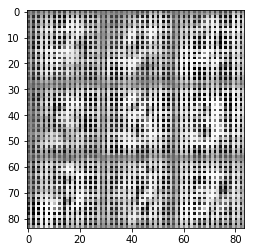

Epoch 0/2 ... Discriminator Loss: 1.2581 ... Generator Loss: 0.4471
Epoch 0/2 ... Discriminator Loss: 0.8901 ... Generator Loss: 0.9868
Epoch 0/2 ... Discriminator Loss: 0.6685 ... Generator Loss: 1.2181
Epoch 0/2 ... Discriminator Loss: 0.4588 ... Generator Loss: 1.3471
Epoch 0/2 ... Discriminator Loss: 0.2614 ... Generator Loss: 5.7588
Epoch 0/2 ... Discriminator Loss: 0.0657 ... Generator Loss: 4.4898
Epoch 0/2 ... Discriminator Loss: 0.1768 ... Generator Loss: 2.4240
Epoch 0/2 ... Discriminator Loss: 0.0515 ... Generator Loss: 6.5306
Epoch 0/2 ... Discriminator Loss: 1.2474 ... Generator Loss: 0.4991
Epoch 0/2 ... Discriminator Loss: 0.9360 ... Generator Loss: 0.7180


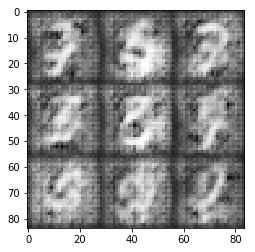

Epoch 0/2 ... Discriminator Loss: 0.4574 ... Generator Loss: 2.1792
Epoch 0/2 ... Discriminator Loss: 0.5495 ... Generator Loss: 1.3961
Epoch 0/2 ... Discriminator Loss: 0.3583 ... Generator Loss: 1.6023
Epoch 0/2 ... Discriminator Loss: 0.0602 ... Generator Loss: 6.1100
Epoch 0/2 ... Discriminator Loss: 0.2730 ... Generator Loss: 6.7097
Epoch 0/2 ... Discriminator Loss: 0.5503 ... Generator Loss: 2.3134
Epoch 0/2 ... Discriminator Loss: 0.5253 ... Generator Loss: 1.2161
Epoch 0/2 ... Discriminator Loss: 0.2896 ... Generator Loss: 3.5368
Epoch 0/2 ... Discriminator Loss: 0.2881 ... Generator Loss: 1.9269
Epoch 0/2 ... Discriminator Loss: 0.5197 ... Generator Loss: 1.1841


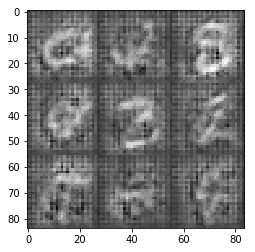

Epoch 0/2 ... Discriminator Loss: 0.4530 ... Generator Loss: 1.8650
Epoch 0/2 ... Discriminator Loss: 0.7891 ... Generator Loss: 1.4725
Epoch 0/2 ... Discriminator Loss: 0.7697 ... Generator Loss: 1.0832
Epoch 0/2 ... Discriminator Loss: 0.8609 ... Generator Loss: 0.8297
Epoch 0/2 ... Discriminator Loss: 0.0815 ... Generator Loss: 6.9078
Epoch 0/2 ... Discriminator Loss: 0.3978 ... Generator Loss: 6.2524
Epoch 0/2 ... Discriminator Loss: 2.5457 ... Generator Loss: 0.1009
Epoch 0/2 ... Discriminator Loss: 0.1139 ... Generator Loss: 2.9257
Epoch 0/2 ... Discriminator Loss: 0.0363 ... Generator Loss: 4.0531
Epoch 0/2 ... Discriminator Loss: 1.0728 ... Generator Loss: 0.5739


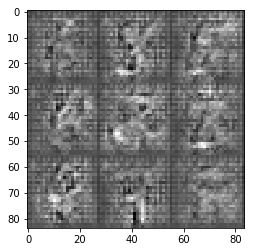

Epoch 0/2 ... Discriminator Loss: 0.2942 ... Generator Loss: 1.7024
Epoch 0/2 ... Discriminator Loss: 0.0482 ... Generator Loss: 4.1090
Epoch 0/2 ... Discriminator Loss: 0.0303 ... Generator Loss: 4.4918
Epoch 0/2 ... Discriminator Loss: 0.2427 ... Generator Loss: 1.9259
Epoch 0/2 ... Discriminator Loss: 0.6155 ... Generator Loss: 9.9766
Epoch 0/2 ... Discriminator Loss: 0.4118 ... Generator Loss: 1.5923
Epoch 0/2 ... Discriminator Loss: 0.3201 ... Generator Loss: 2.4867
Epoch 0/2 ... Discriminator Loss: 1.0654 ... Generator Loss: 0.6672
Epoch 0/2 ... Discriminator Loss: 0.3047 ... Generator Loss: 6.8580
Epoch 0/2 ... Discriminator Loss: 0.5385 ... Generator Loss: 1.2410


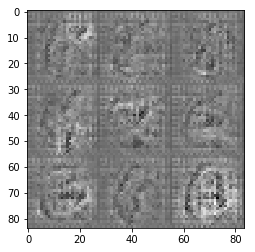

Epoch 0/2 ... Discriminator Loss: 3.4506 ... Generator Loss: 0.0441
Epoch 0/2 ... Discriminator Loss: 1.1091 ... Generator Loss: 0.7624
Epoch 0/2 ... Discriminator Loss: 0.7214 ... Generator Loss: 1.2278
Epoch 0/2 ... Discriminator Loss: 0.6482 ... Generator Loss: 1.1853
Epoch 0/2 ... Discriminator Loss: 0.5174 ... Generator Loss: 1.1691
Epoch 0/2 ... Discriminator Loss: 0.4129 ... Generator Loss: 1.6135
Epoch 0/2 ... Discriminator Loss: 0.1930 ... Generator Loss: 2.5007
Epoch 0/2 ... Discriminator Loss: 0.2911 ... Generator Loss: 1.7992
Epoch 0/2 ... Discriminator Loss: 0.2161 ... Generator Loss: 2.0663
Epoch 0/2 ... Discriminator Loss: 0.4251 ... Generator Loss: 1.3207


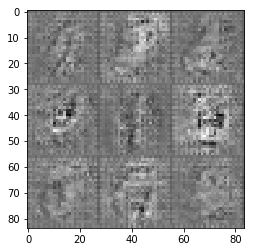

Epoch 0/2 ... Discriminator Loss: 0.0538 ... Generator Loss: 9.2456
Epoch 0/2 ... Discriminator Loss: 0.0907 ... Generator Loss: 2.8092
Epoch 0/2 ... Discriminator Loss: 5.2594 ... Generator Loss: 0.0127
Epoch 0/2 ... Discriminator Loss: 0.8079 ... Generator Loss: 1.1944
Epoch 0/2 ... Discriminator Loss: 0.9370 ... Generator Loss: 1.3486
Epoch 0/2 ... Discriminator Loss: 0.9939 ... Generator Loss: 1.7403
Epoch 0/2 ... Discriminator Loss: 0.9021 ... Generator Loss: 1.0898
Epoch 0/2 ... Discriminator Loss: 0.7180 ... Generator Loss: 1.1042
Epoch 0/2 ... Discriminator Loss: 0.6586 ... Generator Loss: 1.5808
Epoch 0/2 ... Discriminator Loss: 0.6162 ... Generator Loss: 1.7785


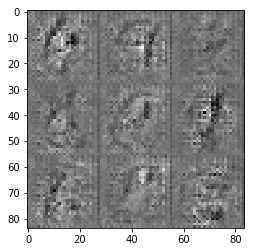

Epoch 0/2 ... Discriminator Loss: 0.7531 ... Generator Loss: 0.9694
Epoch 0/2 ... Discriminator Loss: 0.6364 ... Generator Loss: 1.1536
Epoch 0/2 ... Discriminator Loss: 1.1482 ... Generator Loss: 0.4752
Epoch 1/2 ... Discriminator Loss: 0.8101 ... Generator Loss: 0.8243
Epoch 1/2 ... Discriminator Loss: 1.4690 ... Generator Loss: 5.0655
Epoch 1/2 ... Discriminator Loss: 0.5037 ... Generator Loss: 1.5060
Epoch 1/2 ... Discriminator Loss: 0.1076 ... Generator Loss: 3.2646
Epoch 1/2 ... Discriminator Loss: 0.6088 ... Generator Loss: 2.2990
Epoch 1/2 ... Discriminator Loss: 0.9077 ... Generator Loss: 0.7309
Epoch 1/2 ... Discriminator Loss: 1.8580 ... Generator Loss: 0.2590


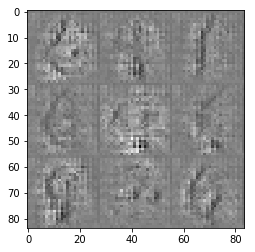

Epoch 1/2 ... Discriminator Loss: 0.2709 ... Generator Loss: 2.1154
Epoch 1/2 ... Discriminator Loss: 0.0810 ... Generator Loss: 3.0265
Epoch 1/2 ... Discriminator Loss: 0.0750 ... Generator Loss: 7.4771
Epoch 1/2 ... Discriminator Loss: 0.2157 ... Generator Loss: 4.8759
Epoch 1/2 ... Discriminator Loss: 0.0240 ... Generator Loss: 4.4129
Epoch 1/2 ... Discriminator Loss: 0.6622 ... Generator Loss: 0.9140
Epoch 1/2 ... Discriminator Loss: 0.7924 ... Generator Loss: 4.9883
Epoch 1/2 ... Discriminator Loss: 0.6566 ... Generator Loss: 6.8109
Epoch 1/2 ... Discriminator Loss: 0.5213 ... Generator Loss: 1.2635
Epoch 1/2 ... Discriminator Loss: 0.1869 ... Generator Loss: 2.2160


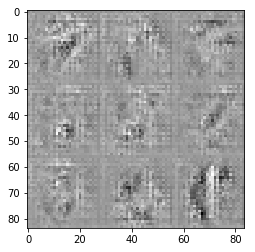

Epoch 1/2 ... Discriminator Loss: 0.5354 ... Generator Loss: 1.4947
Epoch 1/2 ... Discriminator Loss: 0.0564 ... Generator Loss: 3.7394
Epoch 1/2 ... Discriminator Loss: 0.1554 ... Generator Loss: 2.3992
Epoch 1/2 ... Discriminator Loss: 2.6443 ... Generator Loss: 3.4753
Epoch 1/2 ... Discriminator Loss: 0.4989 ... Generator Loss: 1.3896
Epoch 1/2 ... Discriminator Loss: 0.4246 ... Generator Loss: 1.3659
Epoch 1/2 ... Discriminator Loss: 0.0582 ... Generator Loss: 8.8315
Epoch 1/2 ... Discriminator Loss: 0.3944 ... Generator Loss: 1.6760
Epoch 1/2 ... Discriminator Loss: 0.0213 ... Generator Loss: 4.3889
Epoch 1/2 ... Discriminator Loss: 0.0170 ... Generator Loss: 5.2828


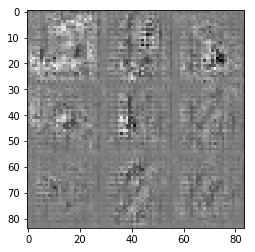

Epoch 1/2 ... Discriminator Loss: 0.0116 ... Generator Loss: 8.5366
Epoch 1/2 ... Discriminator Loss: 0.0053 ... Generator Loss: 10.4649
Epoch 1/2 ... Discriminator Loss: 0.0052 ... Generator Loss: 9.1008
Epoch 1/2 ... Discriminator Loss: 0.0045 ... Generator Loss: 6.6831
Epoch 1/2 ... Discriminator Loss: 0.0322 ... Generator Loss: 6.7197
Epoch 1/2 ... Discriminator Loss: 0.0077 ... Generator Loss: 7.3103
Epoch 1/2 ... Discriminator Loss: 0.0137 ... Generator Loss: 8.7526
Epoch 1/2 ... Discriminator Loss: 0.0158 ... Generator Loss: 4.6275
Epoch 1/2 ... Discriminator Loss: 1.4666 ... Generator Loss: 0.8877
Epoch 1/2 ... Discriminator Loss: 1.0007 ... Generator Loss: 0.8986


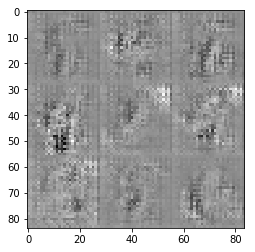

Epoch 1/2 ... Discriminator Loss: 0.8649 ... Generator Loss: 1.0155
Epoch 1/2 ... Discriminator Loss: 0.9763 ... Generator Loss: 0.8911
Epoch 1/2 ... Discriminator Loss: 0.8443 ... Generator Loss: 1.2538
Epoch 1/2 ... Discriminator Loss: 0.7266 ... Generator Loss: 1.1287
Epoch 1/2 ... Discriminator Loss: 0.8560 ... Generator Loss: 0.9996
Epoch 1/2 ... Discriminator Loss: 0.6763 ... Generator Loss: 1.0872
Epoch 1/2 ... Discriminator Loss: 0.6576 ... Generator Loss: 1.6964
Epoch 1/2 ... Discriminator Loss: 0.6805 ... Generator Loss: 1.1654
Epoch 1/2 ... Discriminator Loss: 0.9243 ... Generator Loss: 2.7242
Epoch 1/2 ... Discriminator Loss: 0.6712 ... Generator Loss: 1.1464


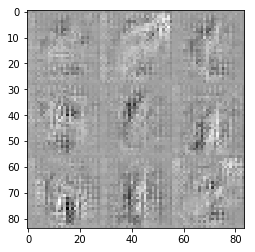

Epoch 1/2 ... Discriminator Loss: 0.5723 ... Generator Loss: 1.4544
Epoch 1/2 ... Discriminator Loss: 0.6452 ... Generator Loss: 1.3343
Epoch 1/2 ... Discriminator Loss: 1.2751 ... Generator Loss: 2.9829
Epoch 1/2 ... Discriminator Loss: 0.4320 ... Generator Loss: 1.6439
Epoch 1/2 ... Discriminator Loss: 0.5081 ... Generator Loss: 1.4572
Epoch 1/2 ... Discriminator Loss: 1.0743 ... Generator Loss: 0.7471
Epoch 1/2 ... Discriminator Loss: 0.8099 ... Generator Loss: 0.9168
Epoch 1/2 ... Discriminator Loss: 1.1719 ... Generator Loss: 0.6225
Epoch 1/2 ... Discriminator Loss: 0.4669 ... Generator Loss: 1.3666
Epoch 1/2 ... Discriminator Loss: 0.6373 ... Generator Loss: 1.3028


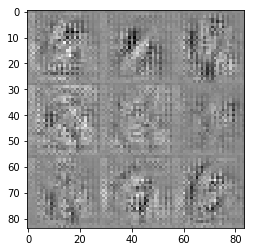

Epoch 1/2 ... Discriminator Loss: 0.1582 ... Generator Loss: 3.4361
Epoch 1/2 ... Discriminator Loss: 0.0600 ... Generator Loss: 3.2652
Epoch 1/2 ... Discriminator Loss: 0.4984 ... Generator Loss: 2.4149
Epoch 1/2 ... Discriminator Loss: 0.3564 ... Generator Loss: 1.6283
Epoch 1/2 ... Discriminator Loss: 0.0589 ... Generator Loss: 6.3023
Epoch 1/2 ... Discriminator Loss: 0.3329 ... Generator Loss: 1.5045
Epoch 1/2 ... Discriminator Loss: 0.7624 ... Generator Loss: 1.9031
Epoch 1/2 ... Discriminator Loss: 1.1089 ... Generator Loss: 0.6406
Epoch 1/2 ... Discriminator Loss: 0.7185 ... Generator Loss: 1.8415
Epoch 1/2 ... Discriminator Loss: 0.2876 ... Generator Loss: 2.5830


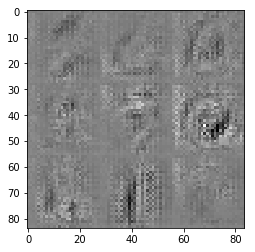

Epoch 1/2 ... Discriminator Loss: 0.0782 ... Generator Loss: 4.7112
Epoch 1/2 ... Discriminator Loss: 0.3234 ... Generator Loss: 3.7893
Epoch 1/2 ... Discriminator Loss: 0.6499 ... Generator Loss: 1.0469
Epoch 1/2 ... Discriminator Loss: 0.1421 ... Generator Loss: 2.4597
Epoch 1/2 ... Discriminator Loss: 0.2755 ... Generator Loss: 1.9739
Epoch 1/2 ... Discriminator Loss: 0.2383 ... Generator Loss: 2.0175
Epoch 1/2 ... Discriminator Loss: 0.5283 ... Generator Loss: 1.6711
Epoch 1/2 ... Discriminator Loss: 0.2282 ... Generator Loss: 1.8172
Epoch 1/2 ... Discriminator Loss: 0.4147 ... Generator Loss: 1.6322
Epoch 1/2 ... Discriminator Loss: 0.0596 ... Generator Loss: 7.5890


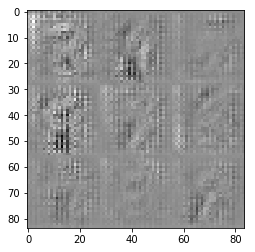

Epoch 1/2 ... Discriminator Loss: 0.0420 ... Generator Loss: 6.5819
Epoch 1/2 ... Discriminator Loss: 0.0189 ... Generator Loss: 7.2626
Epoch 1/2 ... Discriminator Loss: 0.0506 ... Generator Loss: 3.5528
Epoch 1/2 ... Discriminator Loss: 1.1281 ... Generator Loss: 0.5674
Epoch 1/2 ... Discriminator Loss: 0.6945 ... Generator Loss: 1.1633
Epoch 1/2 ... Discriminator Loss: 0.6193 ... Generator Loss: 1.1497
Epoch 1/2 ... Discriminator Loss: 1.2823 ... Generator Loss: 0.4521
Epoch 1/2 ... Discriminator Loss: 0.6172 ... Generator Loss: 1.0565
Epoch 1/2 ... Discriminator Loss: 0.0195 ... Generator Loss: 4.8336
Epoch 1/2 ... Discriminator Loss: 0.5416 ... Generator Loss: 1.3110


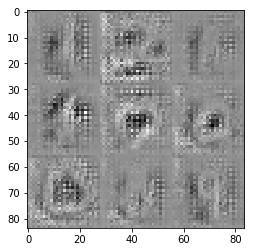

Epoch 1/2 ... Discriminator Loss: 0.0494 ... Generator Loss: 3.5293
Epoch 1/2 ... Discriminator Loss: 0.0313 ... Generator Loss: 4.7924
Epoch 1/2 ... Discriminator Loss: 0.1976 ... Generator Loss: 2.1068
Epoch 1/2 ... Discriminator Loss: 0.0028 ... Generator Loss: 9.3427
Epoch 1/2 ... Discriminator Loss: 0.0022 ... Generator Loss: 9.8023
Epoch 1/2 ... Discriminator Loss: 0.0272 ... Generator Loss: 8.7324
Epoch 1/2 ... Discriminator Loss: 0.0127 ... Generator Loss: 7.8764


In [110]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.